In [3]:
import mat73 # scipy wouldn't load matlab 7.3 files
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime
import cv2
%matplotlib inline

In [5]:
idata = mat73.loadmat('../../data/raw/davos/irccam/irccam_20190816_rad.mat')

In [6]:
idata.keys()

dict_keys(['AZ', 'BT', 'CF', 'CLOUDS', 'CSFIT', 'CameraToffset', 'IRR', 'TM', 'ZA', 'alphadata', 'cloudheight', 'img', 'meteo', 'temp', 'temps', 'tempsstr', 'thor'])

In [7]:
idata['img'][:,:,500].max()

474.92337

In [8]:
idata['img'].max()

552.535

In [9]:
idata['CLOUDS'].shape

(480, 640, 1439)

In [10]:
def plot_img(img):
    figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
    implot = plt.imshow(img, cmap='gray')

In [11]:
import os
PROJECT_PATH = '../..'
RAW_DATA_PATH = os.path.join(PROJECT_PATH, 'data/raw/davos')
DATASET_PATH = os.path.join(PROJECT_PATH, 'data/datasets')

In [81]:
def get_irccam_bt_data(day, idx):
    filename = os.path.join(RAW_DATA_PATH, 'irccam_extract', day, 'bt', '{}.npz'.format(idx))
    img_ir_raw = np.load(filename)['arr_0']
    img_ir = np.nan_to_num(img_ir_raw)
    gray_ir = img_ir - img_ir.min()
    gray_ir *= (255.0/gray_ir.max())
    gray_ir = np.array(gray_ir.round(), dtype = np.uint8)
    return gray_ir

In [82]:
def timestamp_to_idx(timestamp):
    img_time = datetime.datetime.strptime(timestamp, '%Y%m%d%H%M%S')
    start_of_day = datetime.datetime.combine(img_time.date(), datetime.time(0,0,0,0))
    return round(((img_time - start_of_day).total_seconds() / 60.0)) - 1


In [83]:
timestamp = '20180112110700'
day = '20180112'
# timestamp = '20181012082322'
# day = '20181012'

irccam_idx = timestamp_to_idx(timestamp)

irccam_raw = get_irccam_bt_data(day, irccam_idx)
irccam_raw = cv2.flip(irccam_raw, -1)

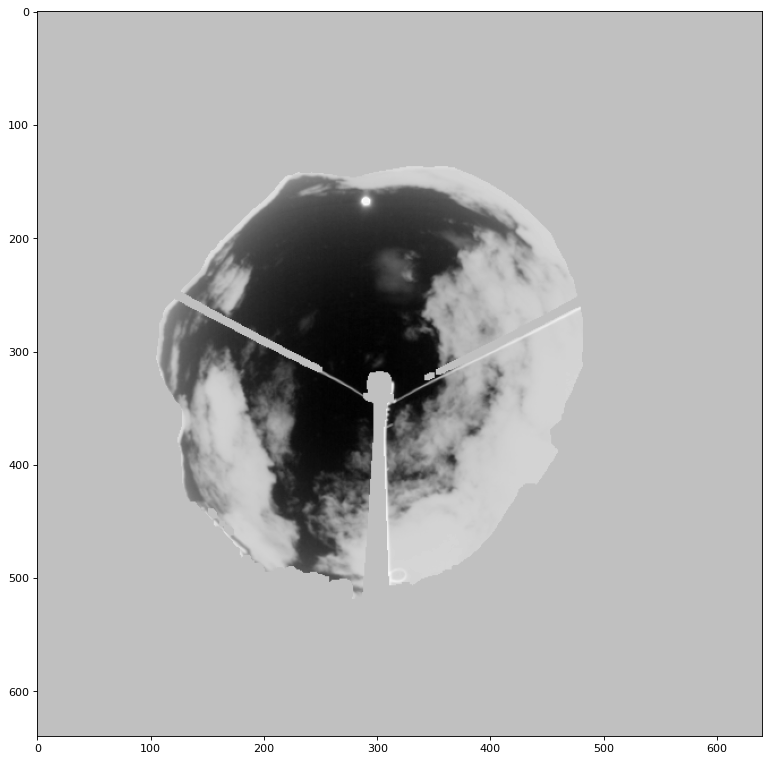

In [84]:
plot_img(irccam_raw)

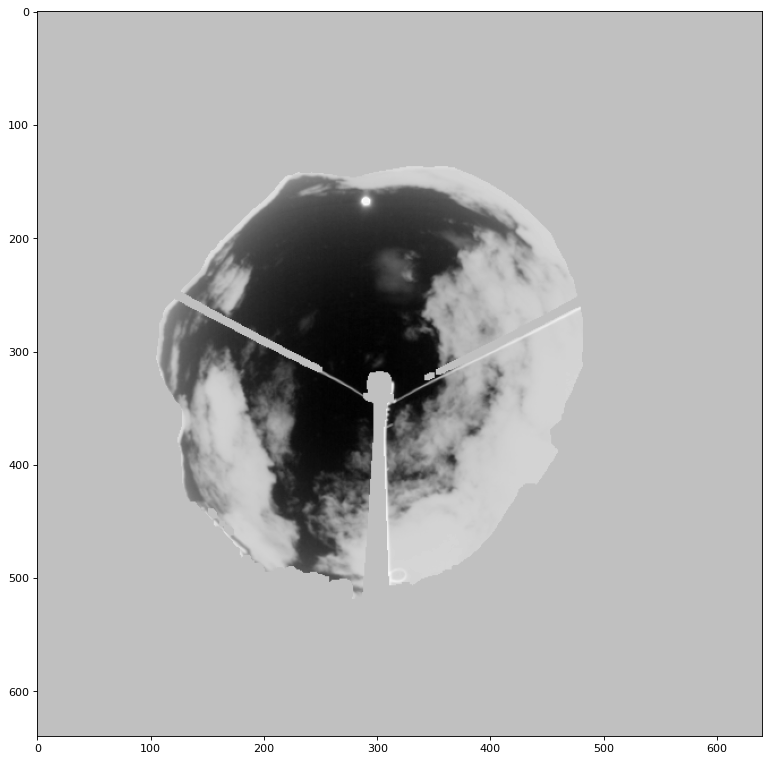

In [54]:
plot_img(irccam_raw)

In [59]:
def process_irccam_img(img):
    cropped_ir = crop_irrcam_img(img)
    return cropped_ir

def crop_irrcam_img(img):
    crop_img = img[110:530, 80:500]
    return crop_img

In [60]:
irccam_img = process_irccam_img(irccam_raw)

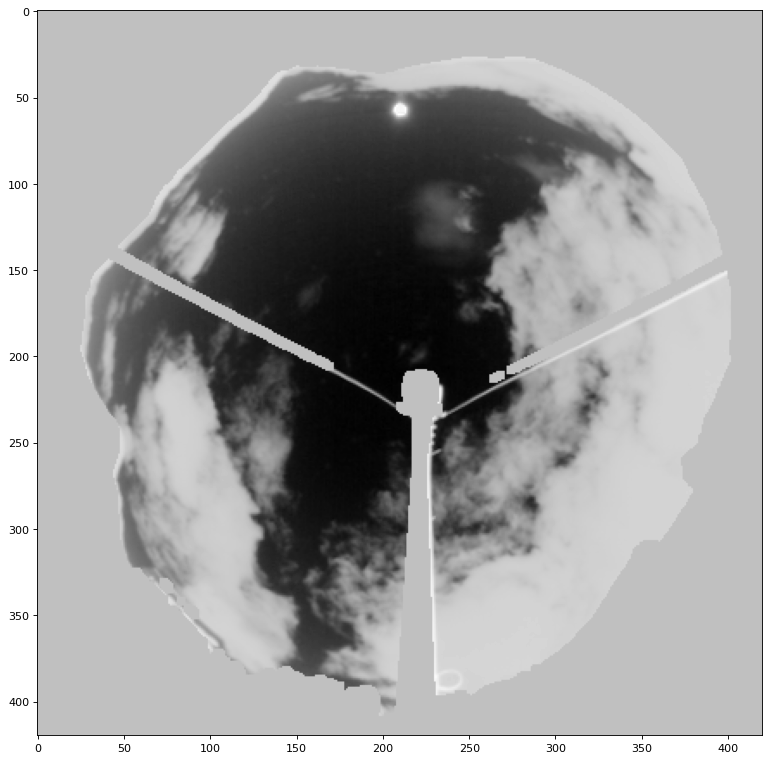

In [61]:
plot_img(irccam_img)

In [72]:

def get_vis_img(timestamp):
    img_time = datetime.datetime.strptime(timestamp, '%Y%m%d%H%M%S')
    file_path = os.path.join(RAW_DATA_PATH, 'rgb', img_time.strftime('%Y%m%d'), '{}_0.jpg'.format(timestamp))
    img_vis = cv2.imread(file_path)
    if img_vis is None:
        raise Exception('Image {} not found'.format(file_path))
    return img_vis


def crop_vis_img(img):
    crop_img = img[50:470, 105:525]
    return crop_img

def scale_vis_img(img):
    scale_img = cv2.resize(img, (640, 480))
    return scale_img

# from https://stackoverflow.com/a/23316542
def rotate_image(image, angle):
    row,col,_ = image.shape
    center=tuple(np.array([row,col])/2)
    rot_mat = cv2.getRotationMatrix2D(center,angle,1.0)
    new_image = cv2.warpAffine(image, rot_mat, (col,row))
    return new_image

def flip_and_rotate_vis_img(img):
    flip_img = cv2.flip(img, 1)
    rotate_img = rotate_image(flip_img, -120)
    return rotate_img

def process_irccam_img(img):
    cropped_ir = crop_irrcam_img(img)
    return cropped_ir

def process_vis_img(img):
    processed_vis = scale_vis_img(img)
    processed_vis = crop_vis_img(processed_vis)
    processed_vis = flip_and_rotate_vis_img(processed_vis)
    return processed_vis

In [73]:
vis_img_raw = get_vis_img(timestamp)
vis_img = process_vis_img(vis_img_raw)

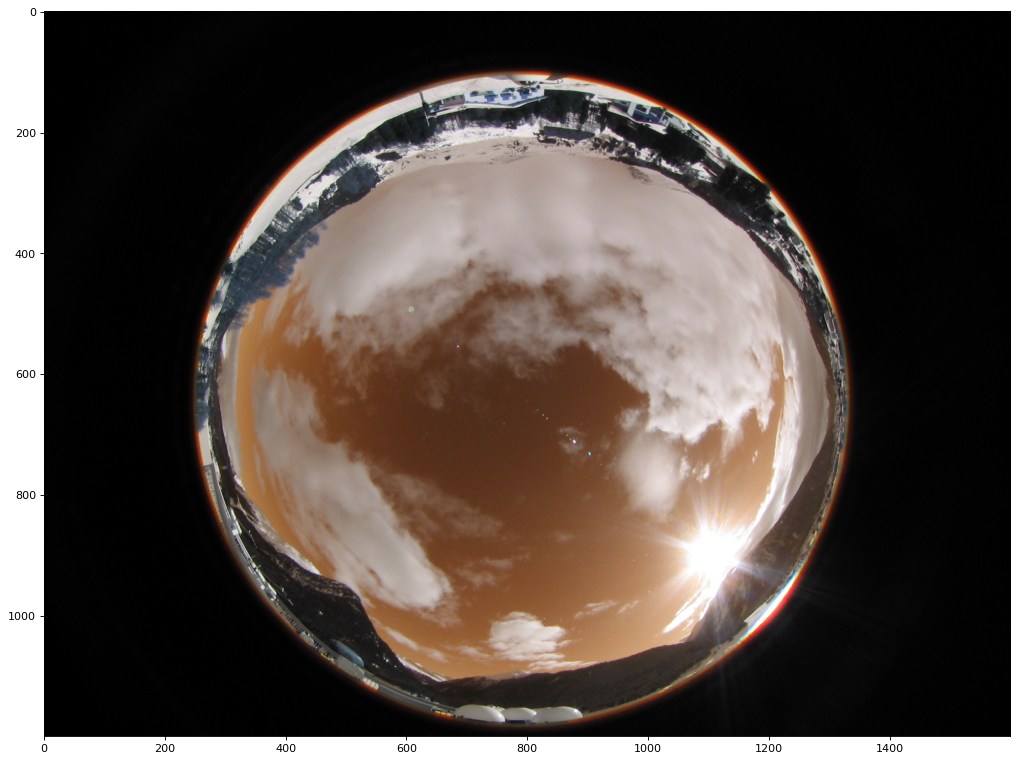

In [74]:
plot_img(vis_img_raw)

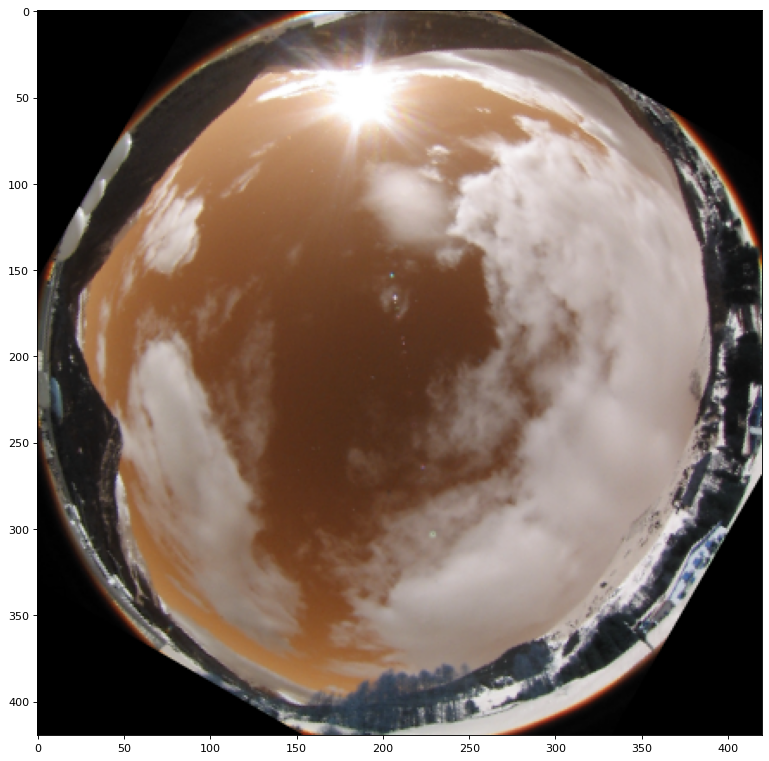

In [75]:
plot_img(vis_img)

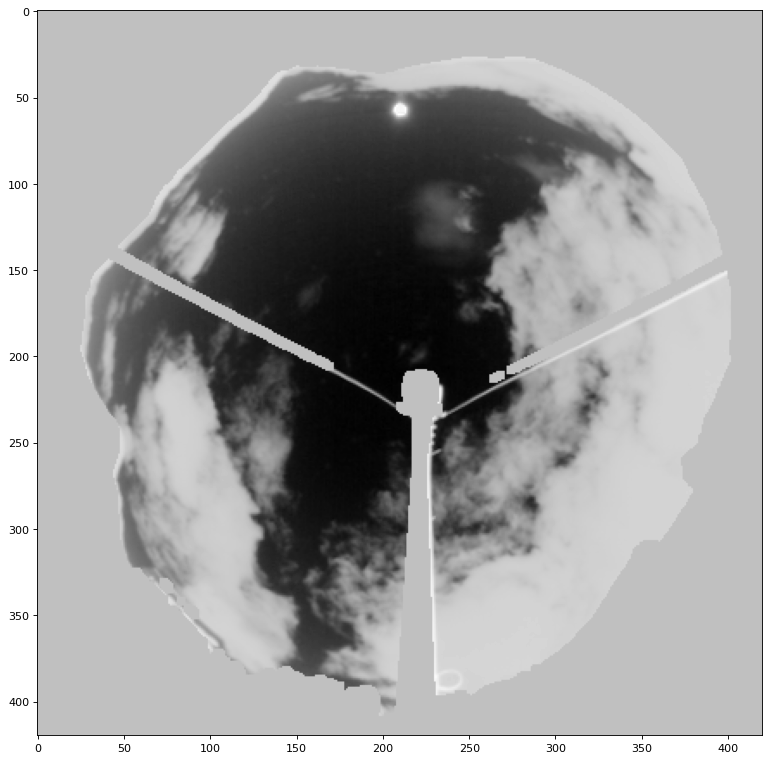

In [76]:
plot_img(irccam_img)